<div class="alert alert-block alert-success">
<h4><center>Harshil Patel (pmb5br@virginia.edu) DS 5001 Spring 2023</center></h4>
</div>

<hr>

<div class="alert alert-block alert-info">
<h3><center> The Sun Also Rises, by Ernest Hemingway</center></h3>
</div>

<hr>

<div class="alert alert-block alert-warning">
<h4><center>Notebook 1: Content</center></h4> 
<ul>
  <li>Importing Text File into a DataFrame</li>
  <li>Removing Front and Back Matter</li>
  <li>Length Distribution - Uncleaned and Cleaned Text</li>
  <li>Grouping Lines into Chapters</li>
  <li>Splitting Text into Chapters</li>
  <li>Splitting Chapters into Paragraphs</li>
  <li>Splitting Paragraphs into Sentences</li>
  <li>Splitting Sentences into Tokens</li>
  <li>Extracting Vocabulary</li>
</ul>
    
Tables saved - lines, chaps, para, tokens, vocab
    
</div>

<hr>

### Set up

In [1]:
import pandas as pd

In [2]:
data_home = "../data"

In [3]:
text_file = f"{data_home}/pg67138.txt"

In [4]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

### Import file into a dataframe

In [5]:
LINES = pd.DataFrame(open(text_file, 'r', encoding='utf-8-sig').readlines(), columns=['line_str'])
LINES.index.name = 'line_num'
LINES.line_str = LINES.line_str.str.replace(r'\n+', ' ', regex=True).str.strip()

In [6]:
LINES.sample(5)

,line_str
line_num,
1205,more than your life.” What a speech! I would l...
6595,"“We’ll watch him with the glasses,” I said."
9760,
1374,"Madeleine, standing on the back platform. From..."
1584,


### Remove Front and Back matter

In [7]:
clip_pats = [
    r"\*\*\*\s*START OF (?:THE|THIS) PROJECT",
    r"\*\*\*\s*END OF (?:THE|THIS) PROJECT"
]

In [8]:
pat_a = LINES.line_str.str.match(clip_pats[0])
pat_b = LINES.line_str.str.match(clip_pats[1])

In [9]:
line_a = LINES.loc[pat_a].index[0] + 1
line_b = LINES.loc[pat_b].index[0] - 1

In [10]:
line_a, line_b

(24, 10227)

In [11]:
LINES = LINES.loc[line_a : line_b]

In [12]:
LINES.head(10)

,line_str
line_num,
24,
25,
26,
27,
28,
29,
30,ERNEST
31,HEMINGWAY
32,


In [13]:
LINES.tail(10)

,line_str
line_num,
10218,together.”
10219,
10220,Ahead was a mounted policeman in khaki directi...
10221,baton. The car slowed suddenly pressing Brett ...
10222,
10223,"“Yes,” I said. “Isn’t it pretty to think so?”"
10224,
10225,THE END
10226,


In [14]:
LINES['n'] = LINES.line_str.str.len()

In [15]:
LINES.n.describe()

count    10204.000000
mean        34.584085
std         30.331804
min          0.000000
25%          0.000000
50%         33.000000
75%         69.000000
max         72.000000
Name: n, dtype: float64

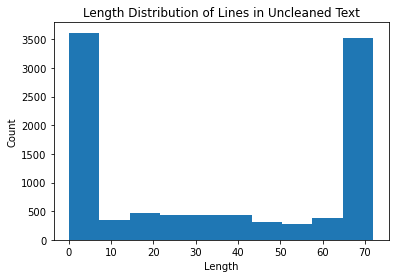

In [16]:
import matplotlib.pyplot as plt
plt.hist(LINES['n'])

plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length Distribution of Lines in Uncleaned Text')

plt.show()

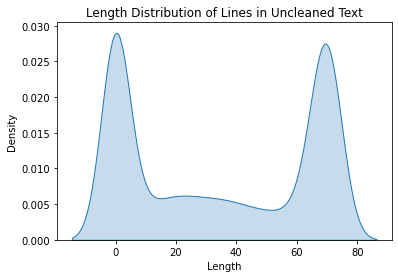

In [17]:
import seaborn as sns

sns.kdeplot(LINES['n'], shade=True)

plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Length Distribution of Lines in Uncleaned Text')

plt.show()

In [18]:
df = LINES.copy()

In [19]:
import numpy as np
df['line_str'].replace('', np.nan, inplace=True) #replacing empty rows with NA's
df= df.dropna(subset=['line_str']) #dropping rows with NA's

In [20]:
df['n'] = df.line_str.str.len()

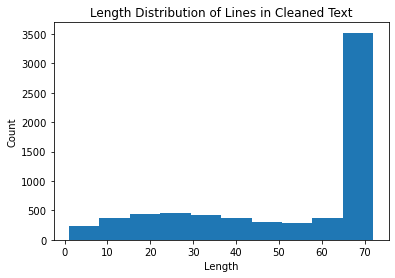

In [21]:
plt.hist(df['n'])

plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Length Distribution of Lines in Cleaned Text')

plt.show()

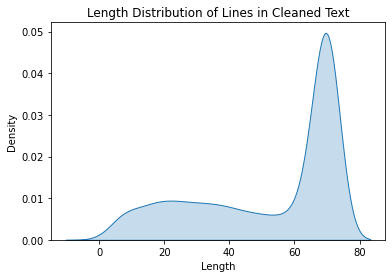

In [22]:
sns.kdeplot(df['n'], shade=True)

plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Length Distribution of Lines in Cleaned Text')

plt.show()

### Group lines into chapter

In [23]:
chap_pat = r"CHAPTER$"
chap_lines = LINES.line_str.str.match(chap_pat, case=False)
LINES.loc[chap_lines]

,line_str,n
line_num,,
85,CHAPTER,7
232,CHAPTER,7
452,CHAPTER,7
945,CHAPTER,7
1362,CHAPTER,7
1600,CHAPTER,7
2062,CHAPTER,7
2714,CHAPTER,7
3243,CHAPTER,7


In [24]:
LINES.loc[chap_lines, 'chap_num'] = [i+1 for i in range(LINES.loc[chap_lines].shape[0])]

In [25]:
LINES.loc[chap_lines]

,line_str,n,chap_num
line_num,,,
85,CHAPTER,7,1.0
232,CHAPTER,7,2.0
452,CHAPTER,7,3.0
945,CHAPTER,7,4.0
1362,CHAPTER,7,5.0
1600,CHAPTER,7,6.0
2062,CHAPTER,7,7.0
2714,CHAPTER,7,8.0
3243,CHAPTER,7,9.0


In [26]:
LINES.chap_num = LINES.chap_num.ffill()

In [27]:
LINES.sample(10)

,line_str,n,chap_num
line_num,,,
5794,"“Come off it, Michael. You’re drunk,” Brett said.",49,13.0
411,,0,2.0
2009,“You know Robert is going to get material for ...,69,6.0
7546,,0,16.0
1743,of arrested development.”,25,6.0
3262,,0,9.0
4046,,0,10.0
2609,,0,7.0
10048,,0,19.0


In [28]:
LINES.head(10)

,line_str,n,chap_num
line_num,,,
24,,0,NaN
25,,0,NaN
26,,0,NaN
27,,0,NaN
28,,0,NaN
29,,0,NaN
30,ERNEST,6,NaN
31,HEMINGWAY,9,NaN
32,,0,NaN


In [29]:
LINES = LINES.dropna(subset=['chap_num'])
LINES = LINES.loc[~chap_lines]
LINES.chap_num = LINES.chap_num.astype('int')

In [30]:
LINES.sample(10)

,line_str,n,chap_num
line_num,,,
8915,"buy tickets to see him, the crowd demanded tha...",70,18
10066,,0,19
7086,,0,16
586,better avoided. I was bored enough. Just then ...,70,3
7804,"“I won’t stand it,” Bill said.",30,17
8483,He smiled.,10,17
9393,“Let’s get a car and all go as far as Bayonne....,71,19
339,“I want to go to South America.”,32,2
4843,,0,12


In [31]:
len(LINES)

10124

In [32]:
OHCO[:1]

['chap_num']

In [33]:
csv_file = f"{data_home}/output/lines.csv"
LINES.to_csv(csv_file)

In [34]:
CHAPS = LINES.groupby(OHCO[:1])\
    .line_str.apply(lambda x: '\n'.join(x))\
    .to_frame('chap_str') 

In [35]:
CHAPS.head(10)

,chap_str
chap_num,
1,1\n\n\nRobert Cohn was once middleweight boxin...
2,2\n\n\nThat winter Robert Cohn went over to Am...
3,3\n\n\nIt was a warm spring night and I sat at...
4,"4\n\n\nThe taxi went up the hill, passed the l..."
5,5\n\n\nIn the morning I walked down the Boulev...
6,6\n\n\nAt five o’clock I was in the Hotel Cril...
7,7\n\n\nAs I started up the stairs the concierg...
8,8\n\n\nI did not see Brett again until she cam...
9,9\n\n\nThe Ledoux-Kid Francis fight was the ni...


In [36]:
CHAPS['chap_str'] = CHAPS['chap_str'].str.replace(r'^\d+\s*', '', regex=True).str.strip()

In [37]:
CHAPS

,chap_str
chap_num,
1,Robert Cohn was once middleweight boxing champ...
2,That winter Robert Cohn went over to America w...
3,It was a warm spring night and I sat at a tabl...
4,"The taxi went up the hill, passed the lighted ..."
5,In the morning I walked down the Boulevard to ...
6,At five o’clock I was in the Hotel Crillon wai...
7,As I started up the stairs the concierge knock...
8,I did not see Brett again until she came back ...
9,The Ledoux-Kid Francis fight was the night of ...


### Split chapters into paragraphs

In [38]:
para_pat = r'\n\n+'

In [39]:
OHCO[:2]

['chap_num', 'para_num']

In [40]:
PARAS = CHAPS['chap_str'].str.split(para_pat, expand=True).stack()\
    .to_frame('para_str').sort_index()
PARAS.index.names = OHCO[:2]

In [41]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         Robert Cohn was once middleweight boxing champ...
         1         I mistrust all frank and simple people, especi...
         2         Robert Cohn was a member, through his father, ...
         3         The divorce was arranged and Robert Cohn went ...
         4         By that time, though, he had other things to w...

In [42]:
PARAS['para_str'] = PARAS['para_str'].str.replace(r'\n', ' ', regex=True)
PARAS['para_str'] = PARAS['para_str'].str.strip()
PARAS = PARAS[~PARAS['para_str'].str.match(r'^\s*$')]

In [43]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         Robert Cohn was once middleweight boxing champ...
         1         I mistrust all frank and simple people, especi...
         2         Robert Cohn was a member, through his father, ...
         3         The divorce was arranged and Robert Cohn went ...
         4         By that time, though, he had other things to w...

### Split Paragraphs into sentences

In [44]:
OHCO[:3]

['chap_num', 'para_num', 'sent_num']

In [45]:
sent_pat = r'[.?!;:]+'
SENTS = PARAS['para_str'].str.split(sent_pat, expand=True).stack()\
    .to_frame('sent_str')
SENTS.index.names = OHCO[:3]

In [46]:
SENTS = SENTS[~SENTS['sent_str'].str.match(r'^\s*$')]
SENTS.sent_str = SENTS.sent_str.str.strip()

In [47]:
SENTS.head()

sent_str
chap_num para_num sent_num                                                   
1        0        0         Robert Cohn was once middleweight boxing champ...
                  1         Do not think that I am very much impressed by ...
                  2         He cared nothing for boxing, in fact he dislik...
                  3         There was a certain inner comfort in knowing h...
                  4                          He was Spider Kelly’s star pupil

### Split sentences into tokens

In [48]:
token_pat = r'[^\w]+'
TOKENS = SENTS['sent_str'].str.split(token_pat, expand=True)\
    .stack()\
    .to_frame('token_str')

TOKENS = TOKENS[TOKENS['token_str'] != '']

In [49]:
TOKENS.index.names = OHCO[:4]

In [50]:
TOKENS.head()

token_str
chap_num para_num sent_num token_num              
1        0        0        0                Robert
                           1                  Cohn
                           2                   was
                           3                  once
                           4          middleweight

In [51]:
TOKENS.tail()

token_str
chap_num para_num sent_num token_num          
19       264      1        5                to
                           6             think
                           7                so
         265      0        0               THE
                           1               END

In [52]:
len(TOKENS)

70377

### Extract Vocabulary

In [53]:
TOKENS['term_str'] = TOKENS.token_str.replace(r'[\W_]+', '', regex=True).str.lower()
VOCAB = TOKENS.term_str.value_counts().to_frame('n').reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'

In [54]:
len(VOCAB)

4710

In [55]:
VOCAB.head()

,term_str,n
term_id,,
0,the,4484
1,i,2334
2,and,2290
3,to,1590
4,a,1534


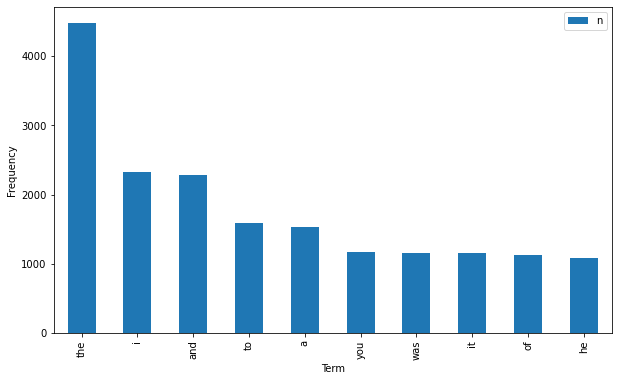

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

VOCAB.iloc[:10].plot(x='term_str', y='n', kind='bar', ax=ax)

ax.set_xlabel('Term')
ax.set_ylabel('Frequency')

plt.show()

In [68]:
VOCAB.shape

(4710, 2)

In [63]:
LINES.n.describe()

count    10124.000000
mean        34.753457
std         30.341858
min          0.000000
25%          0.000000
50%         33.000000
75%         69.000000
max         72.000000
Name: n, dtype: float64

In [64]:
len(CHAPS)

19

In [57]:
TOKENS.head()

token_str      term_str
chap_num para_num sent_num token_num                            
1        0        0        0                Robert        robert
                           1                  Cohn          cohn
                           2                   was           was
                           3                  once          once
                           4          middleweight  middleweight

### Save Dataframes

In [58]:
csv_file = f"{data_home}/output/chaps.csv"
CHAPS.to_csv(csv_file)

In [59]:
csv_file = f"{data_home}/output/para.csv"
PARAS.to_csv(csv_file)

In [60]:
csv_file = f"{data_home}/output/tokens.csv"
TOKENS.to_csv(csv_file)

In [61]:
csv_file = f"{data_home}/output/vocab.csv"
VOCAB.to_csv(csv_file)